https://github.com/chmduquesne/quickviz

In [8]:
%matplotlib ipympl

In [9]:
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import iseaborn

In [10]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")

# Count

In [11]:
iseaborn.countplot(titanic)

# Heatmap

In [12]:
iseaborn.heatmap(iris)

# Pairplot

In [13]:
iseaborn.pairplot(iris)

# Barplot

In [7]:
%matplotlib ipympl

In [8]:
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import iseaborn

In [9]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")

In [10]:
iseaborn.barplot(iris)

# Histplot

In [1]:
%matplotlib ipympl

In [1]:
import ipywidgets as ipyw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import iseaborn

In [2]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")

In [3]:
iseaborn.histplot(iris)

tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab

In [4]:
import ipywidgets as ipyw
import seaborn as sns
import iseaborn
print(ipyw.__version__)
df = sns.load_dataset("iris")

7.5.1


In [12]:
class SeabornBooklet(ipyw.Tab):
    
    def __init__(self, df=None):
        
        super().__init__()
        
        tab_names = ["Barplot", 'Countplot', 'Heatmap', "Histplot", 'Pairplot']
        
        barplot_ui   = iseaborn.barplot(df)
        countplot_ui = iseaborn.countplot(df)
        heatmap_ui   = iseaborn.heatmap(df)
        histplot_ui  = iseaborn.histplot(df)
        pairplot_ui  = iseaborn.pairplot(df)
        tab_content = [barplot_ui, countplot_ui, heatmap_ui, histplot_ui, pairplot_ui]
        
        children = tab_content
        
        # this is the Tab interface
        self.children = children
        for i, name in enumerate(tab_names):
            self.set_title(i, name)
    
        

In [13]:
b = SeabornBooklet(df)
b

SeabornBooklet(children=(HBox(children=(VBox(children=(Dropdown(description='x:', options=('sepal_length', 'se…

In [16]:
!pwd

/Users/mocquin/Documents/CLE/Optique/Python/JUPYTER/MYLIB10/MODULES/iseaborn


In [5]:
from seaborn_widgets_map import gen_widgets, plot

In [6]:
widgets_dicts = gen_widgets(df)

In [30]:
import warnings
warnings.filterwarnings("ignore")


class EnableableWidget(ipyw.HBox):
    
    def __init__(self, main_widget, widget_name):
        super().__init__()
        self.main_widget = main_widget
        self.enable_checkbox_widget = ipyw.Checkbox(
            value=False,
            description=widget_name,
            disabled=False,
            indent=False
        )
        # only a link is necessary here
        self.enabling_link = ipyw.link((self.main_widget, 'disabled'), (self.enable_checkbox_widget, 'value'))   
        
        self.children = [self.enable_checkbox_widget, self.main_widget]

In [31]:
EnableableWidget(ipyw.FloatText(1), "Toto")

EnableableWidget(children=(Checkbox(value=False, description='Toto', indent=False), FloatText(value=1.0)))

In [7]:
    


class PlotInterface(ipyw.HBox):
    
    def __init__(self, df, func_name, wdict):
        super().__init__()
        self.wdict = wdict
        
        vbox_names = ipyw.VBox()
        vbox_widgets = ipyw.VBox()
        
        names = []
        widgets = []
        for wname, w in self.wdict.items():
            names.append(ipyw.Label(wname))
            widgets.append(w)
        
        
        vbox_names.children = names
        vbox_widgets.children = widgets
        
        func = getattr(sns, func_name)
        
        def plot(**kwargs):
            if func_name not in ["distplot", "kdeplot"]:
                return func(data=df, **kwargs)
            else:
                return func(**kwargs)
        
        
        out = ipyw.interactive_output(plot, self.wdict)    
        self.children = [vbox_names, vbox_widgets, out]

    

In [8]:
PlotInterface(df, "pairplot", widgets_dicts["pairplot"])

PlotInterface(children=(VBox(children=(Label(value='hue'), Label(value='palette'), Label(value='kind'), Label(…

In [9]:
     
class SeabornBookletFull(ipyw.Tab):
    
    def __init__(self, df):
        
        super().__init__()
        
        tab_names = []
        tab_contents = []
        for plot_name, widget_dict in widgets_dicts.items():
            if not plot_name == "*":
                # get tab name
                tab_names.append(plot_name)       
                # get all widgets in a VBox
                plot_interace = PlotInterface(df, plot_name, widgets_dicts[plot_name])
                tab_contents.append(plot_interace)
        
        # set tab content with widgets
        self.children = tab_contents
        # set tab titles
        for i, name in enumerate(tab_names):
            self.set_title(i, name)

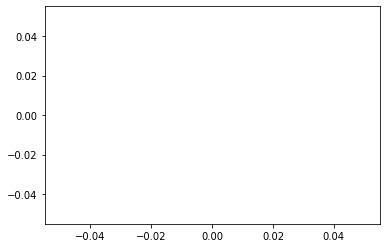

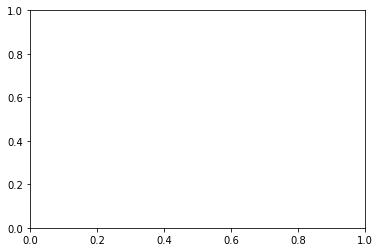

SeabornBookletFull(children=(PlotInterface(children=(VBox(children=(Label(value='x'), Label(value='y'), Label(…

In [10]:
SeabornBookletFull(df)

In [19]:

class SeabornBookletFull(ipyw.Tab):
    
    def __init__(self, df=None):
        
        super().__init__()
        
        tab_names = []
        tab_contents = []
        for plot_name, widget_dict in widgets_dicts.items():
            if not plot_name == "*":
                # get tab name
                tab_names.append(plot_name)       
                # get all widgets in a VBox
                vbox_args = ipyw.VBox()
                widget_list = []
                for widget_name, widget in widget_dict.items():
                    widget_list.append(ipyw.HBox([widget]))
                    
                output = widgets.Output()                
                vbox_args.children = widget_list
                with self.output:
                    # clear_output de IPython.display
                    clear_output(wait=True)
                    self.gen_plot()
                    show_inline_matplotlib_plots()
                tab_contents.append(vbox_args)
        
        # set tab content with widgets
        self.children = tab_contents
        # set tab titles
        for i, name in enumerate(tab_names):
            self.set_title(i, name)
                    

In [20]:
SeabornBookletFull(df)

SeabornBookletFull(children=(VBox(children=(HBox(children=(Dropdown(options=('sepal_length', 'sepal_width', 'p…

In [1]:
import seaborn as sns
from seaborn_widgets_map import WidgetDispenser, PLOTS

iris = sns.load_dataset("iris")
iris_widgets = WidgetDispenser(iris)
iris_widgets("a")
# return a Dropdown widget containing the cols names

Dropdown(description='a', options=(('sepal_length', [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…

In [1]:
%matplotlib ipympl

In [2]:
import seaborn as sns
from seaborn_widgets_map import WidgetDispenser, PLOTS
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as ipyw
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots
iris = sns.load_dataset("iris")

In [3]:
plot_dict = {}
plot_dict["heatmap"]  =PLOTS["heatmap"]


In [17]:
class PlotUI(ipyw.HBox):
    
    def __init__(self, df, plot_name):
        super().__init__()
        self.df = df
        self.plot_name = plot_name
        
        # set plot dict
        self.plot_dict = PLOTS[plot_name]
        self.wdispenser = WidgetDispenser(df)
        
        self.enabled_args  = []
        self.widgets_names = []
        self.widgets_list  = []

        # create a VBox and Output widgets
        vbox = ipyw.VBox()
        hbox = ipyw.HBox()
        self.output = ipyw.Output()

        
        # create widgets and add them to the HBox
        for arg_name, widget_name in self.plot_dict.items():
            # create widget
            w = self.wdispenser(widget_name)
            
            self.widgets_names.append(arg_name)
            cb = self._create_enable_checkbox(descr=arg_name)
            self._link_enable_status(w, cb)
            
            box = [cb, w]
            
            self.widgets_list.append(ipyw.HBox(box))
        
        self.connect_widgets()
        
        # set the widgets in a VBox
        vbox.children = [*self.widgets_list]
        
        # wrap all the UI for the plot in a hbox
        self.children = [vbox, self.output]
    
    def _create_enable_checkbox(self, descr="Disable:"):
        return ipyw.Checkbox(description=descr, value=True)
    
    def _link_enable_status(self, w, cb):
        return ipyw.link((cb, "value"), (w, "disabled"))


    def connect_widgets(self):
        for wbox in self.widgets_list:
            children = wbox.children
            children[1].observe(self.display_plot, 'value')    
            children[0].observe(self.display_plot, "value")
            
    def retrieve_enabled_kwargs(self):
        kwargs = {}
        for wbox, wname in zip(self.widgets_list, self.widgets_names):
            children = wbox.children
            if children[0].value == False:
                kwargs[wname] = children[1].value   
        return kwargs
        
    def display_plot(self, *_):
        # clear_output de IPython.display
        clear_output(wait=True)
        #gen_plot()
        kwargs = self.retrieve_enabled_kwargs()
        # get all widgets names and values in a dict
        self.plot(kwargs)
        #show_inline_matplotlib_plots()   
            
    def plot(self, kwargs):
        with self.output:
            clear_output(wait=True)
            fig, ax = plt.subplots()
            method = getattr(sns, self.plot_name)
            if self.plot_name == "heatmap":
                kwargs["data"] = self.df.corr()
            elif self.plot_name not in ["distplot", "kdeplot"]:
                kwargs["data"]=self.df
            res = method(**kwargs, ax=ax)
            return res
    

In [18]:
ui = PlotUI(iris, "heatmap")
ui

PlotUI(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='vmin'), FloatText(value=1.0, …

In [19]:
import ipywidgets as ipyw
import seaborn as sns
import pandas as pd

class SeabornBookletFull(ipyw.Tab):
    
    def __init__(self, df=None, plot_dict=PLOTS):
        if not isinstance(df, pd.DataFrame):
            raise ValueError

        super().__init__()
        
        self.df = df
        self.tab_names = []
        self.tab_contents = []
        
        for plot in plot_dict:
            ui = PlotUI(self.df, plot)
            self.tab_names.append(plot)
            self.tab_contents.append(ui)
        
        self.children = self.tab_contents
        for i, name in enumerate(self.tab_names):
            self.set_title(i, name)

In [20]:
s = SeabornBookletFull(iris)

In [21]:
s

SeabornBookletFull(children=(PlotUI(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='…

In [22]:
import ipywidgets as ipyw
import seaborn as sns
import pandas as pd

class SeabornBookletFull(ipyw.Tab):
    
    def __init__(self, df=None, plot_dict=PLOTS):
        
        if not isinstance(df, pd.DataFrame):
            raise ValueError
        
        super().__init__()
        
        self.df = df
        self.wdispenser = WidgetDispenser(df)

        self.tab_names = []
        self.tab_contents = []
        self.outputs = []
        self.widget_lists = []
        self.widget_names_lists = []
        
        ## WIDGET CREATION
        # loop over tab/plot type to create outputs and widgets
        for plot_name, plot_arg_list in plot_dict.items():
            print("---------- Creating", plot_name)
            # get tab name with plot name
            self.tab_names.append(plot_name)
            self.widget_names_lists.append(plot_arg_list)
            # get all widgets in a VBox
            widget_list = []
            # create a VBox and Output widgets
            vbox = ipyw.VBox()
            hbox = ipyw.HBox()
            woutput = ipyw.Output()
            self.outputs.append(woutput)
            # create widgets and add them to the HBox
            for arg_name, widget_name in plot_arg_list.items():
                # create widget
                print("creating widget for ", arg_name)
                w = self.wdispenser(widget_name)
                widget_list.append(w)
            self.widget_lists.append(widget_list)
            vbox.children = [*widget_list]
            
            # wrap all the UI for the plot in a hbox
            hbox.children = [vbox, woutput]
            
            self.tab_contents.append(hbox)
        
        self._connect_widgets()
        
    
        self.children = self.tab_contents
        for i, name in enumerate(self.tab_names):
            self.set_title(i, name)
                    

    def plot(self, plot_type, kwargs):
        method = getattr(sns, plot_type)
        if plot_type not in ["distplot", "kdeplot"]:
            kwargs["data"]=self.df
        return method(**kwargs)
        
    def _connect_widgets(self):
        
        for plot_name, widget_list, output, wnames_list in zip(self.tab_names,
                                                               self.widget_lists, 
                                                               self.outputs,
                                                               self.widget_names_lists):
            # create a function to display plot on right output
            def display_plot(*_):
                with output:
                    # clear_output de IPython.display
                    clear_output(wait=True)
                    #gen_plot()
                    kwargs = {}
                    # get all widgets names and values in a dict
                    for wname, w in zip(wnames_list, widget_list):
                        kwargs[wname] = w.value
                        
                    print("plotname :", plot_name)
                    print("kwargs : ", kwargs)
                    self.plot(plot_name, kwargs)
                    show_inline_matplotlib_plots()   
            # link widgets values to trigger a replot
            for w in widget_list:
                w.observe(display_plot, 'value')
            

      

In [23]:
s = SeabornBookletFull(iris, plot_dict)

---------- Creating heatmap
creating widget for  vmin
creating widget for  vmax
creating widget for  cmap
creating widget for  center
creating widget for  robust
creating widget for  annot
creating widget for  fmt
creating widget for  linewidths
creating widget for  linecolor
creating widget for  cbar
creating widget for  square


In [24]:
display(s)

SeabornBookletFull(children=(HBox(children=(VBox(children=(FloatText(value=1.0, description='vmin', step=0.1),…

In [1]:
%matplotlib ipympl

In [2]:
import seaborn as sns
from iseaborn import PlotUI, SeabornBookletFull

In [3]:
iris = sns.load_dataset("iris")

In [4]:
PlotUI()

PlotUI(children=(VBox(children=(HBox(children=(Checkbox(value=True, description='x', indent=False, layout=Layo…

In [ ]:
SeabornBookletFull(iris)